In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_meta = pd.read_json("../data/raw/meta-New_York.json", lines=True)
df_meta.head(10)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,A-Top Insurance,"A-Top Insurance, 1009 Brighton Beach Ave, Broo...",0x89c24469c758686b:0x641f5b84cb9bedfa,None,40.578254,-73.959127,"[Insurance broker, Insurance agency]",2.0,4,None,"[[Thursday, 10AM–6PM], [Friday, 10AM–6PM], [Sa...",None,Open ⋅ Closes 6PM,"[0x89c24449907718fb:0x31b554a0983f621d, 0x4065...",https://www.google.com/maps/place//data=!4m2!3...
1,T-Mobile,"T-Mobile, 3923 103rd St, Queens, NY 11368",0x89c25fc9494dce47:0x6d63c807b59a55,None,40.750146,-73.862536,"[Cell phone store, Electronic parts supplier, ...",3.5,95,$$,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 8PM,"[0x89c25fc7a91c609f:0xb103d6a261373fd, 0x89c25...",https://www.google.com/maps/place//data=!4m2!3...
2,Ace Hardware,"Ace Hardware, 130 4th Ave, New York, NY 10003",0x89c259992463b6e1:0x4a601a43752541dd,"Chain retailer stocking household tools, suppl...",40.733182,-73.990201,"[Hardware store, Building materials store, Ele...",3.4,8,None,"[[Thursday, 8AM–6:30PM], [Friday, 8AM–6:30PM],...",None,Permanently closed,"[0x89c2598340fb6509:0xa996f3db49ba6e78, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
3,"Agricultural Consulting Services, Inc.","Agricultural Consulting Services, Inc., 370 Su...",0x89d14bf74320aea5:0x720261cd8960f8cd,None,43.054743,-77.649136,[Corporate office],3.0,1,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",None,Open ⋅ Closes 5PM,None,https://www.google.com/maps/place//data=!4m2!3...
4,Long Point,"Long Point, Ledyard, NY 13026",0x89d0bd8d2df8d10f:0x77a8f349f40492fa,None,42.715626,-76.710227,[Peninsula],5.0,1,None,None,None,None,None,"https://www.google.com/maps/place/Ledyard,+NY+..."
5,Chef Chucks Table,"Chef Chucks Table, 6128 NY-89, Ovid, NY 14521",0x89d0be3bcc338707:0x3e3d9bf1247ba191,None,42.727924,-76.765099,[Diner],4.7,3,None,"[[Thursday, Closed], [Friday, Closed], [Saturd...","{'Service options': ['Delivery'], 'Amenities':...",Permanently closed,"[0x89d0eba9d9c0f817:0x1f127a3049db854d, 0x89d0...",https://www.google.com/maps/place//data=!4m2!3...
6,Gillespie Chevrolet Parts,"Gillespie Chevrolet Parts, 128 Cayuga St, Unio...",0x89d0ba60bb7d710f:0x877e749ac7f9304a,None,42.840487,-76.692377,[Auto parts store],4.6,18,None,"[[Thursday, 7:30AM–8PM], [Friday, 7:30AM–5PM],...","{'Service options': ['In-store shopping'], 'Ac...",Open ⋅ Closes 8PM,"[0x89d0ab78eb57aca9:0x3a78b7d92d2e3950, 0x89d0...",https://www.google.com/maps/place//data=!4m2!3...
7,Garbe Associates Insurance,"Garbe Associates Insurance, 655 NY-25A, Mt Sin...",0x89e841975461fb8f:0x16df15574a663326,None,40.937405,-73.013675,"[Auto insurance agency, Home insurance agency,...",5.0,15,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['Online appointments', 'O...",Open ⋅ Closes 5PM,"[0x89e8467f2df7b617:0xcb658e8afd7323f8, 0x89e8...",https://www.google.com/maps/place//data=!4m2!3...
8,Olympian Home Services,"Olympian Home Services, 47-1 Greenpoint Ave, S...",0x89c25edecfa4856b:0xcf6562424fd0e7fb,None,40.742730,-73.917634,"[Home inspector, Water testing service]",5.0,8,None,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...",None,Open ⋅ Closes 9PM,"[0x89c28a752aaae833:0x4f06d104464ff704, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
9,Arcana Juventa Anti-Aging Spa,"Arcana Juventa Anti-Aging Spa, 14 Brighton 11t...",0x89c244688b7609cd:0x205e2d8d173dd35e,None,40.582130,-73.956333,"[Spa, Waterproofing company]",4.1,15,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",None,Permanently closed,"[0x89c2446bdf00743d:0x1a016c5e3c603c88, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
def read_json_in_chunks(file_path, chunk_size=10000):
    """Read large JSON file in chunks"""
    chunks = []

    with open(file_path, 'r') as file:
        chunk = []
        for i, line in enumerate(file):
            chunk.append(line)

            if (i + 1) % chunk_size == 0:
                # use StringIO to wrap the JSON string
                json_string = '\n'.join(chunk)
                chunk_df = pd.read_json(StringIO(json_string), lines=True)
                chunks.append(chunk_df)
                chunk = []  # Reset chunk

                print(f"Processed {i + 1} lines...")

        # process remaining lines
        if chunk:
            json_string = '\n'.join(chunk)
            chunk_df = pd.read_json(StringIO(json_string), lines=True)
            chunks.append(chunk_df)

    return pd.concat(chunks, ignore_index=True)

df_review = read_json_in_chunks("../data/raw/review-New_York_10.json")

Processed 10000 lines...
Processed 20000 lines...
Processed 30000 lines...
Processed 40000 lines...
Processed 50000 lines...
Processed 60000 lines...
Processed 70000 lines...
Processed 80000 lines...
Processed 90000 lines...
Processed 100000 lines...
Processed 110000 lines...
Processed 120000 lines...
Processed 130000 lines...
Processed 140000 lines...
Processed 150000 lines...
Processed 160000 lines...
Processed 170000 lines...
Processed 180000 lines...
Processed 190000 lines...
Processed 200000 lines...
Processed 210000 lines...
Processed 220000 lines...
Processed 230000 lines...
Processed 240000 lines...
Processed 250000 lines...
Processed 260000 lines...
Processed 270000 lines...
Processed 280000 lines...
Processed 290000 lines...
Processed 300000 lines...
Processed 310000 lines...
Processed 320000 lines...
Processed 330000 lines...
Processed 340000 lines...
Processed 350000 lines...
Processed 360000 lines...
Processed 370000 lines...
Processed 380000 lines...
Processed 390000 line

In [4]:
df_review.head(10)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,1.149982e+20,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,1.171782e+20,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
5,1.105551e+20,claribel placeres,1456098569126,1,Worse customer ever ! More then 30min to make ...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
6,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
7,1.105551e+20,claribel placeres,1456098569126,1,Worse customer ever ! More then 30min to make ...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
8,1.102709e+20,Mireya Robles,1614117783581,5,(Translated by Google) Very good store\n\n(Ori...,None,"{'time': 1551791348997, 'text': 'We love our T...",0x89c25fc9494dce47:0x6d63c807b59a55
9,1.101825e+20,Jose Abimelec “MELE” Castro,1603310536331,5,"(Translated by Google) Thank you, prompt and k...",None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [5]:
# Filter to NYC food businesses
def norm_categories(c):
    if isinstance(c, list): return {str(x).strip().lower() for x in c if pd.notna(x)}
    if pd.isna(c): return set()
    return {str(c).strip().lower()}

food_words = {"restaurant","cafe","coffee","bar","pizza","burger","food"}

df_meta["is_food"] = df_meta["category"].apply(
    lambda c: any(any(w in cat for w in food_words) for cat in norm_categories(c))
)

# NYC bounds
NYC_LAT_MIN, NYC_LAT_MAX = 40.477399, 40.917577
NYC_LON_MIN, NYC_LON_MAX = -74.259090, -73.700272

in_nyc = df_meta["latitude"].between(NYC_LAT_MIN, NYC_LAT_MAX) & df_meta["longitude"].between(NYC_LON_MIN, NYC_LON_MAX)
meta_food = df_meta[df_meta["is_food"] & in_nyc].copy()

# Filter reviews to NYC food businesses
keep_ids = set(meta_food["gmap_id"].astype(str))
df_review = df_review[df_review['gmap_id'].astype(str).isin(keep_ids)].copy()

print(f"Reviews: {len(df_review):,}")
print(f"Businesses: {len(meta_food):,}")

Reviews: 4,938,571
Businesses: 33,251


In [ ]:
meta_food.to_parquet("../data/processed/ny_food_meta.parquet", index=False)
df_review.to_parquet("../data/processed/ny_food_reviews.parquet", index=False)

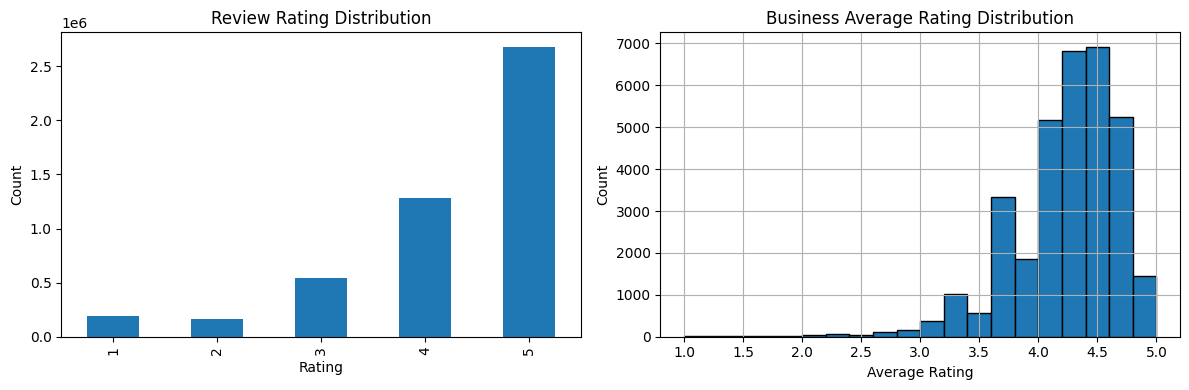

Review ratings - Mean: 4.25
Business ratings - Mean: 4.20


In [ ]:
## ratinf distribution
plt.figure(figsize=(12, 4))

# review ratings
plt.subplot(1, 2, 1)
df_review['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# business average ratings
plt.subplot(1, 2, 2)
meta_food['avg_rating'].hist(bins=20, edgecolor='black')
plt.title('Business Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"Review ratings - Mean: {df_review['rating'].mean():.2f}")
print(f"Business ratings - Mean: {meta_food['avg_rating'].mean():.2f}")

Text(0, 0.5, 'Count')

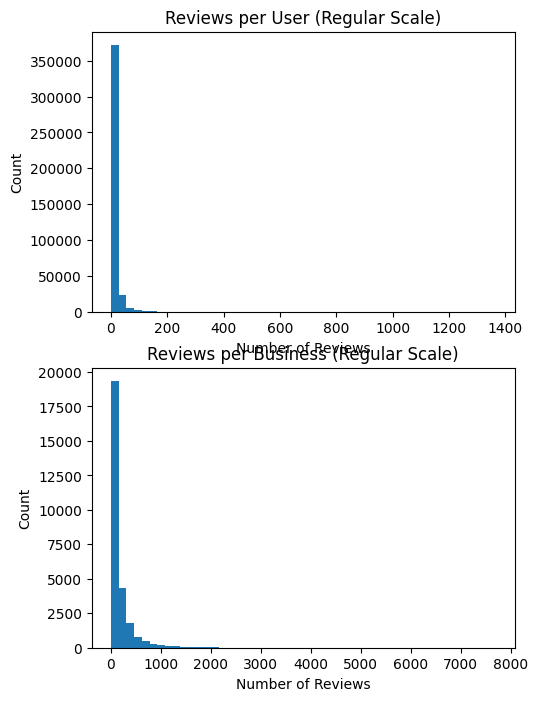

In [ ]:
plt.figure(figsize=(12, 8))

# reviews per user - regular scale
plt.subplot(2, 2, 1)
user_counts = df_review['user_id'].value_counts()
plt.hist(user_counts, bins=50)
plt.title('Reviews per User (Regular Scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')

# reviews per business - regular scale
plt.subplot(2, 2, 3)
business_counts = df_review['gmap_id'].value_counts()
plt.hist(business_counts, bins=50)
plt.title('Reviews per Business (Regular Scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')


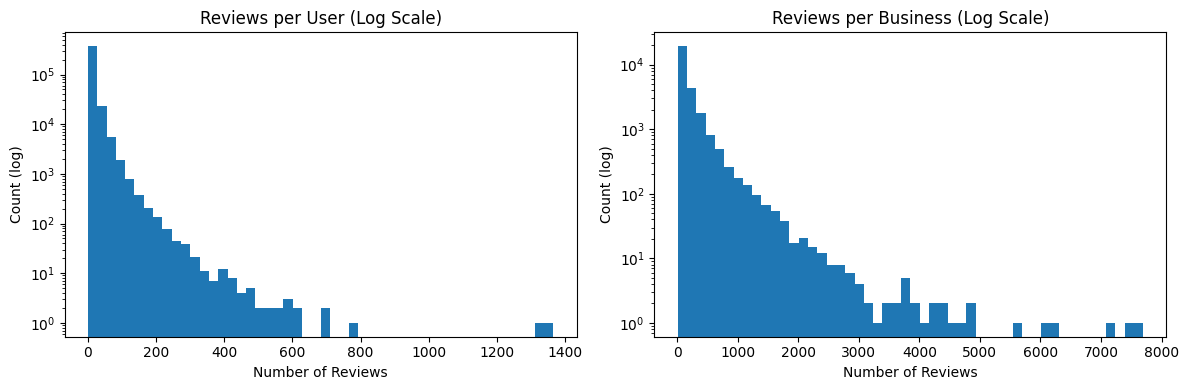

Users: 404,478
Avg reviews per user: 12.0
Avg reviews per business: 175.4


In [ ]:
# activity distribution
plt.figure(figsize=(12, 4))

# reviews per user
plt.subplot(1, 2, 1)
user_counts = df_review['user_id'].value_counts()
plt.hist(user_counts, bins=50, log=True)
plt.title('Reviews per User (Log Scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Count (log)')

# reviews per business
plt.subplot(1, 2, 2)
business_counts = df_review['gmap_id'].value_counts()
plt.hist(business_counts, bins=50, log=True)
plt.title('Reviews per Business (Log Scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Count (log)')

plt.tight_layout()
plt.show()

print(f"Users: {df_review['user_id'].nunique():,}")
print(f"Avg reviews per user: {user_counts.mean():.1f}")
print(f"Avg reviews per business: {business_counts.mean():.1f}")

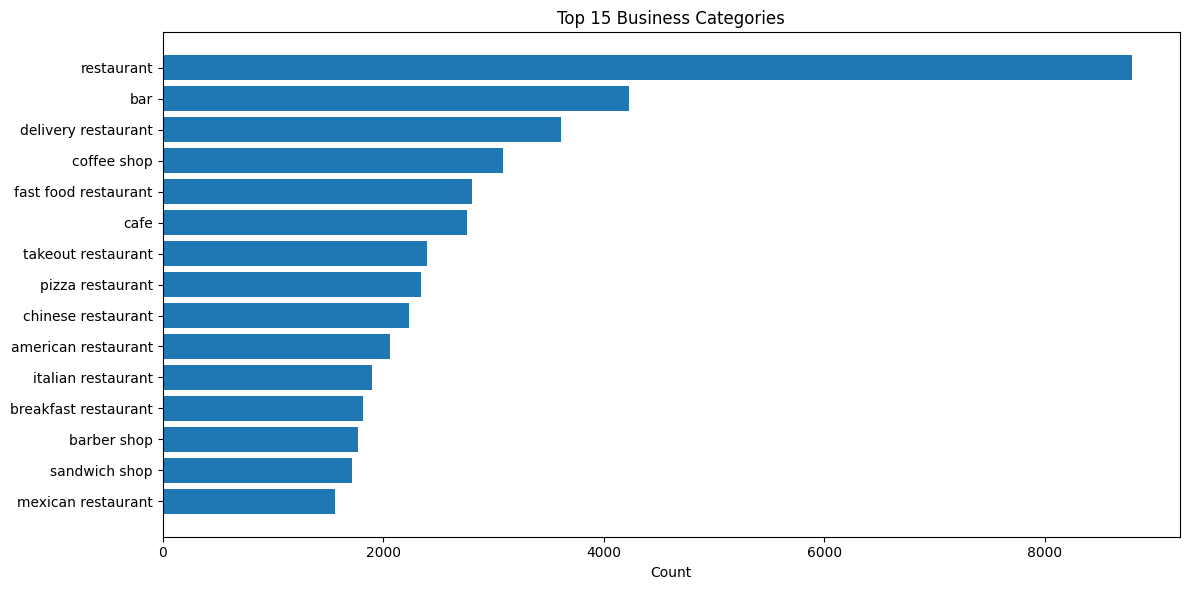

In [ ]:
# top categories
all_cats = []
for cats in meta_food['category'].dropna():
    if isinstance(cats, list):
        all_cats.extend([str(c).lower().strip() for c in cats])

from collections import Counter
top_cats = Counter(all_cats).most_common(15)

plt.figure(figsize=(12, 6))
categories, counts = zip(*top_cats)
plt.barh(range(len(categories)), counts)
plt.yticks(range(len(categories)), categories)
plt.title('Top 15 Business Categories')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Date range: 1990-12-31 to 2021-09-06
Total time span: 11207 days


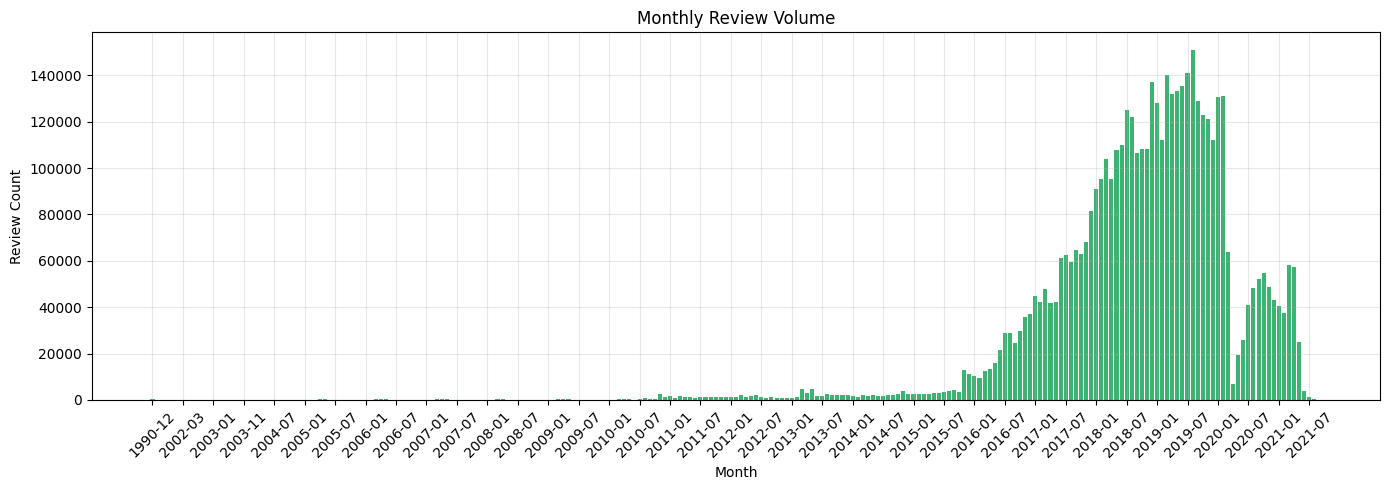

Peak month: 2019-08 (151,034 reviews)
Lowest month: 1999-07 (1 reviews)


In [ ]:
# convert timestamp to datetime
df_review['datetime'] = pd.to_datetime(df_review['time'], unit='ms')
df_review['date'] = df_review['datetime'].dt.date
df_review['year'] = df_review['datetime'].dt.year
df_review['month'] = df_review['datetime'].dt.month
df_review['year_month'] = df_review['datetime'].dt.to_period('M')

print(f"Date range: {df_review['date'].min()} to {df_review['date'].max()}")
print(f"Total time span: {(df_review['date'].max() - df_review['date'].min()).days} days")

# monthly counts
monthly_counts = df_review['year_month'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(range(len(monthly_counts)), monthly_counts.values, color='mediumseagreen')

# Show every 6th label to avoid congestion
ax.set_xticks(range(0, len(monthly_counts), 6))
ax.set_xticklabels([str(month) for month in monthly_counts.index[::6]], rotation=45)

ax.set_title('Monthly Review Volume')
ax.set_xlabel('Month')
ax.set_ylabel('Review Count')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Peak month: {monthly_counts.idxmax()} ({monthly_counts.max():,} reviews)")
print(f"Lowest month: {monthly_counts.idxmin()} ({monthly_counts.min():,} reviews)")

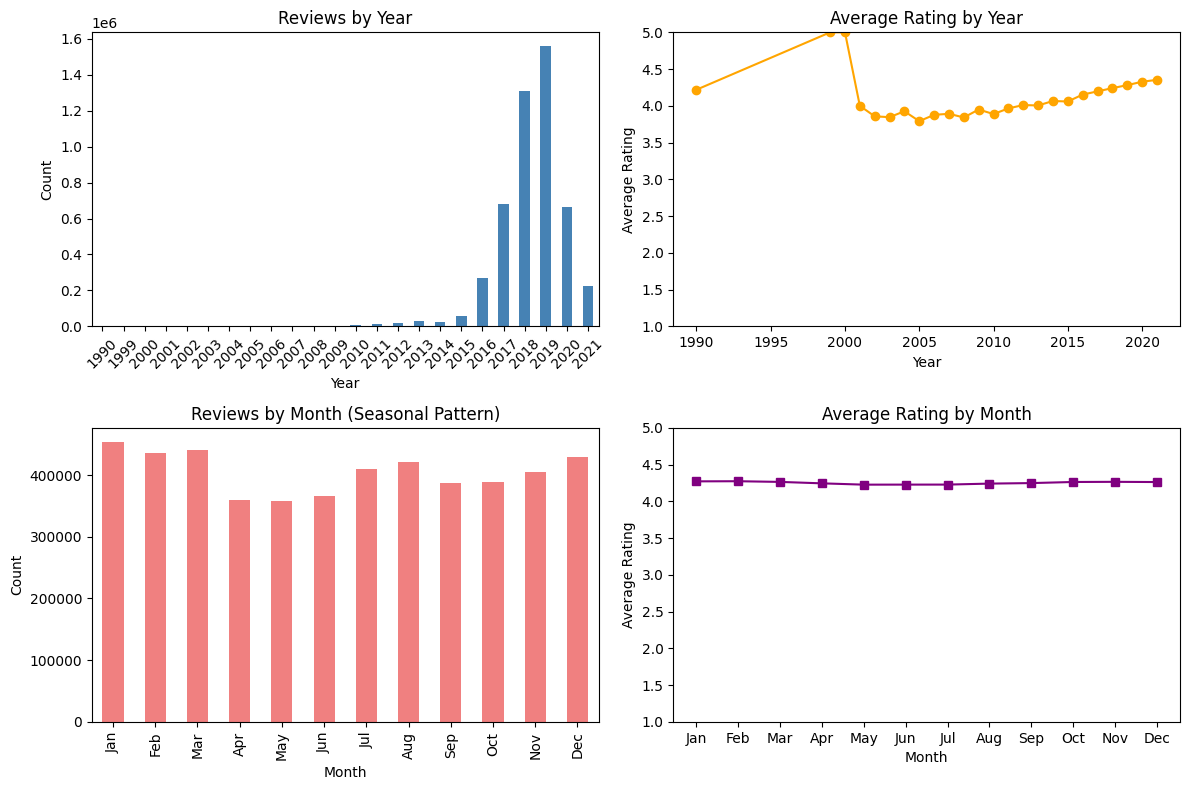

In [ ]:
plt.figure(figsize=(12, 8))

# yearly review volume
plt.subplot(2, 2, 1)
yearly_counts = df_review['year'].value_counts().sort_index()
yearly_counts.plot(kind='bar', color='steelblue')
plt.title('Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

# average rating by year
plt.subplot(2, 2, 2)
yearly_ratings = df_review.groupby('year')['rating'].mean()
yearly_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(1, 5)

# monthly pattern (all years combined)
plt.subplot(2, 2, 3)
monthly_pattern = df_review.groupby('month')['rating'].count()
monthly_pattern.plot(kind='bar', color='lightcoral')
plt.title('Reviews by Month (Seasonal Pattern)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# average rating by month
plt.subplot(2, 2, 4)
monthly_rating = df_review.groupby('month')['rating'].mean()
monthly_rating.plot(kind='line', marker='s', color='purple')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(1, 5)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 32.6 MB/s eta 0:00:00


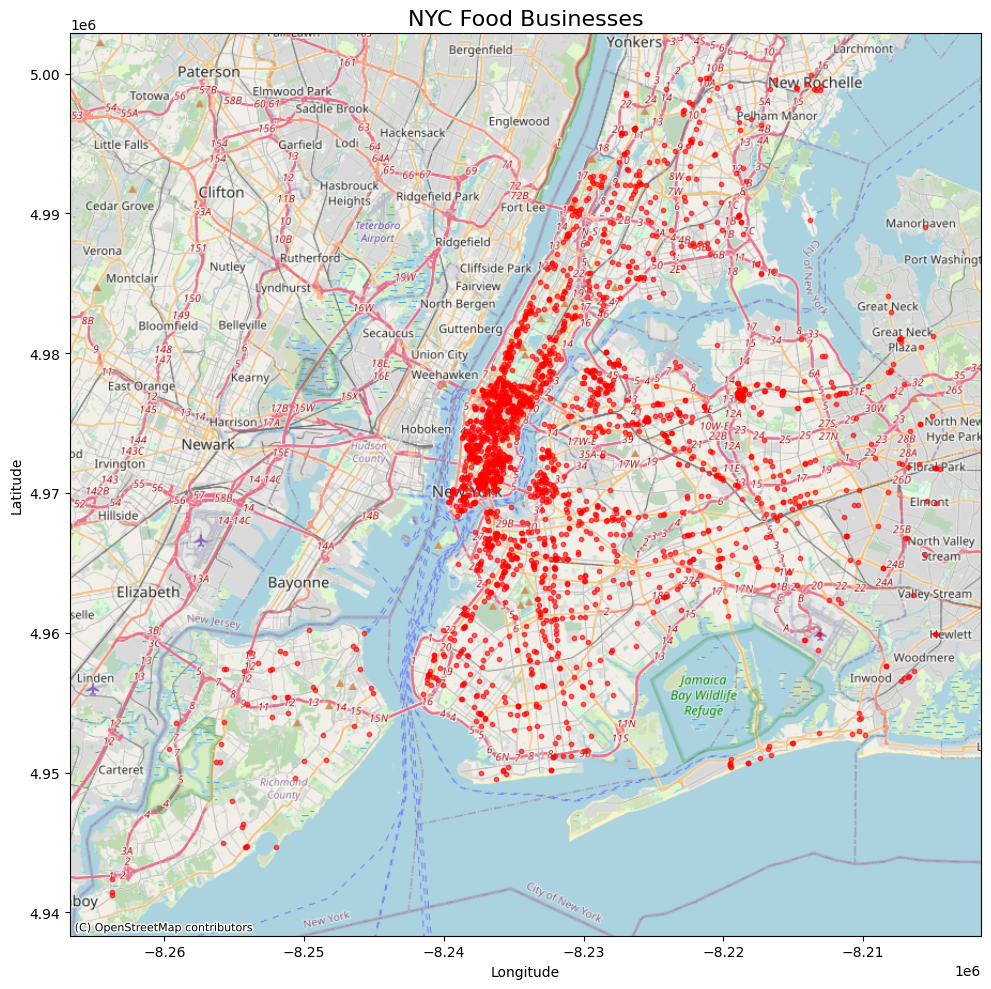

In [ ]:
## THANK U CLAUDE

import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Convert to GeoDataFrame
sample_geo = meta_food.sample(n=min(2000, len(meta_food)), random_state=42)
geometry = [Point(xy) for xy in zip(sample_geo['longitude'], sample_geo['latitude'])]
gdf = gpd.GeoDataFrame(sample_geo, geometry=geometry, crs='EPSG:4326')

# Convert to Web Mercator for contextily
gdf = gdf.to_crs('EPSG:3857')

# Create plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot points
gdf.plot(ax=ax, alpha=0.6, markersize=10, color='red')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Set title and labels
ax.set_title('NYC Food Businesses', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()